### Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix
import joblib


import warnings
warnings.filterwarnings("ignore")

### Read_Data

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (768, 9)


In [6]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.duplicated().sum()


0

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## model_1 Training

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 )

In [12]:
model_1 = LogisticRegression()
model_1.fit(x_train , y_train)


LogisticRegression()

In [13]:
model_1_predict = model_1.predict(x_test)

In [14]:
model_1_score = model_1.score(x_test , y_test)
model_1_score

0.7467532467532467

In [15]:
print(metrics.classification_report(y_test , model_1_predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Visulization

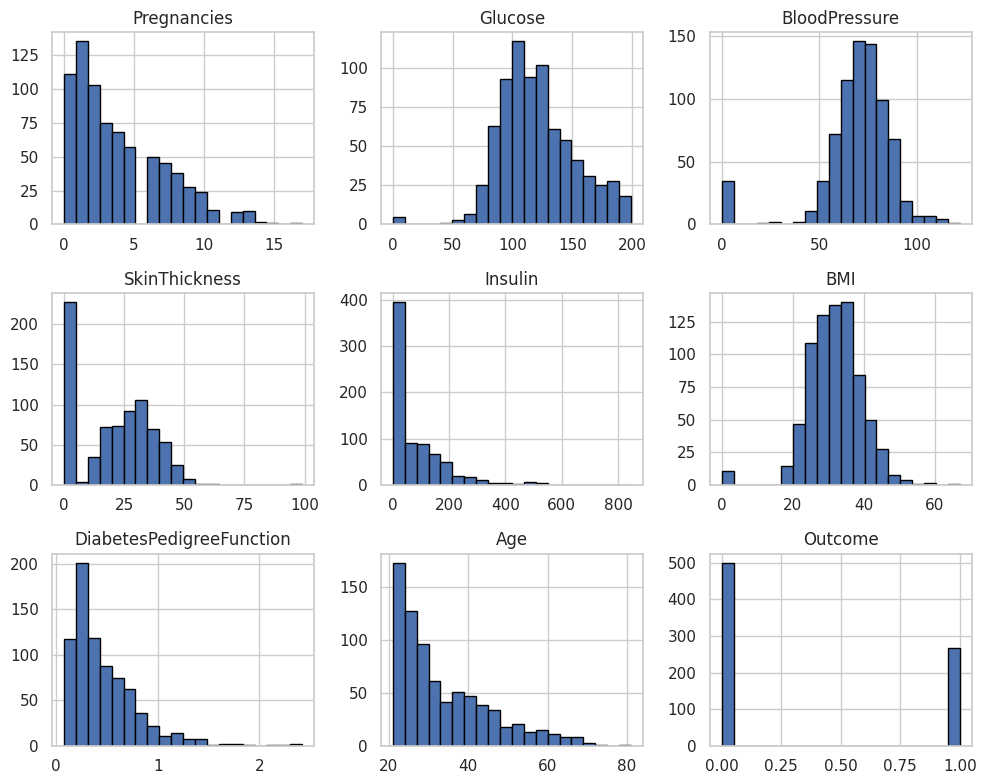

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


**Skewness:** Many of the features like Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age are skewed, which means that the data is concentrated on one side.

**Near Gaussian:** Features like Glucose, BloodPressure and BMI appear more Gaussian.

**Binary:** Outcome is clearly binary, with 2 distinct peaks, showing the imbalanced nature of the data

**Ranges:** Each feature has a different range and scale

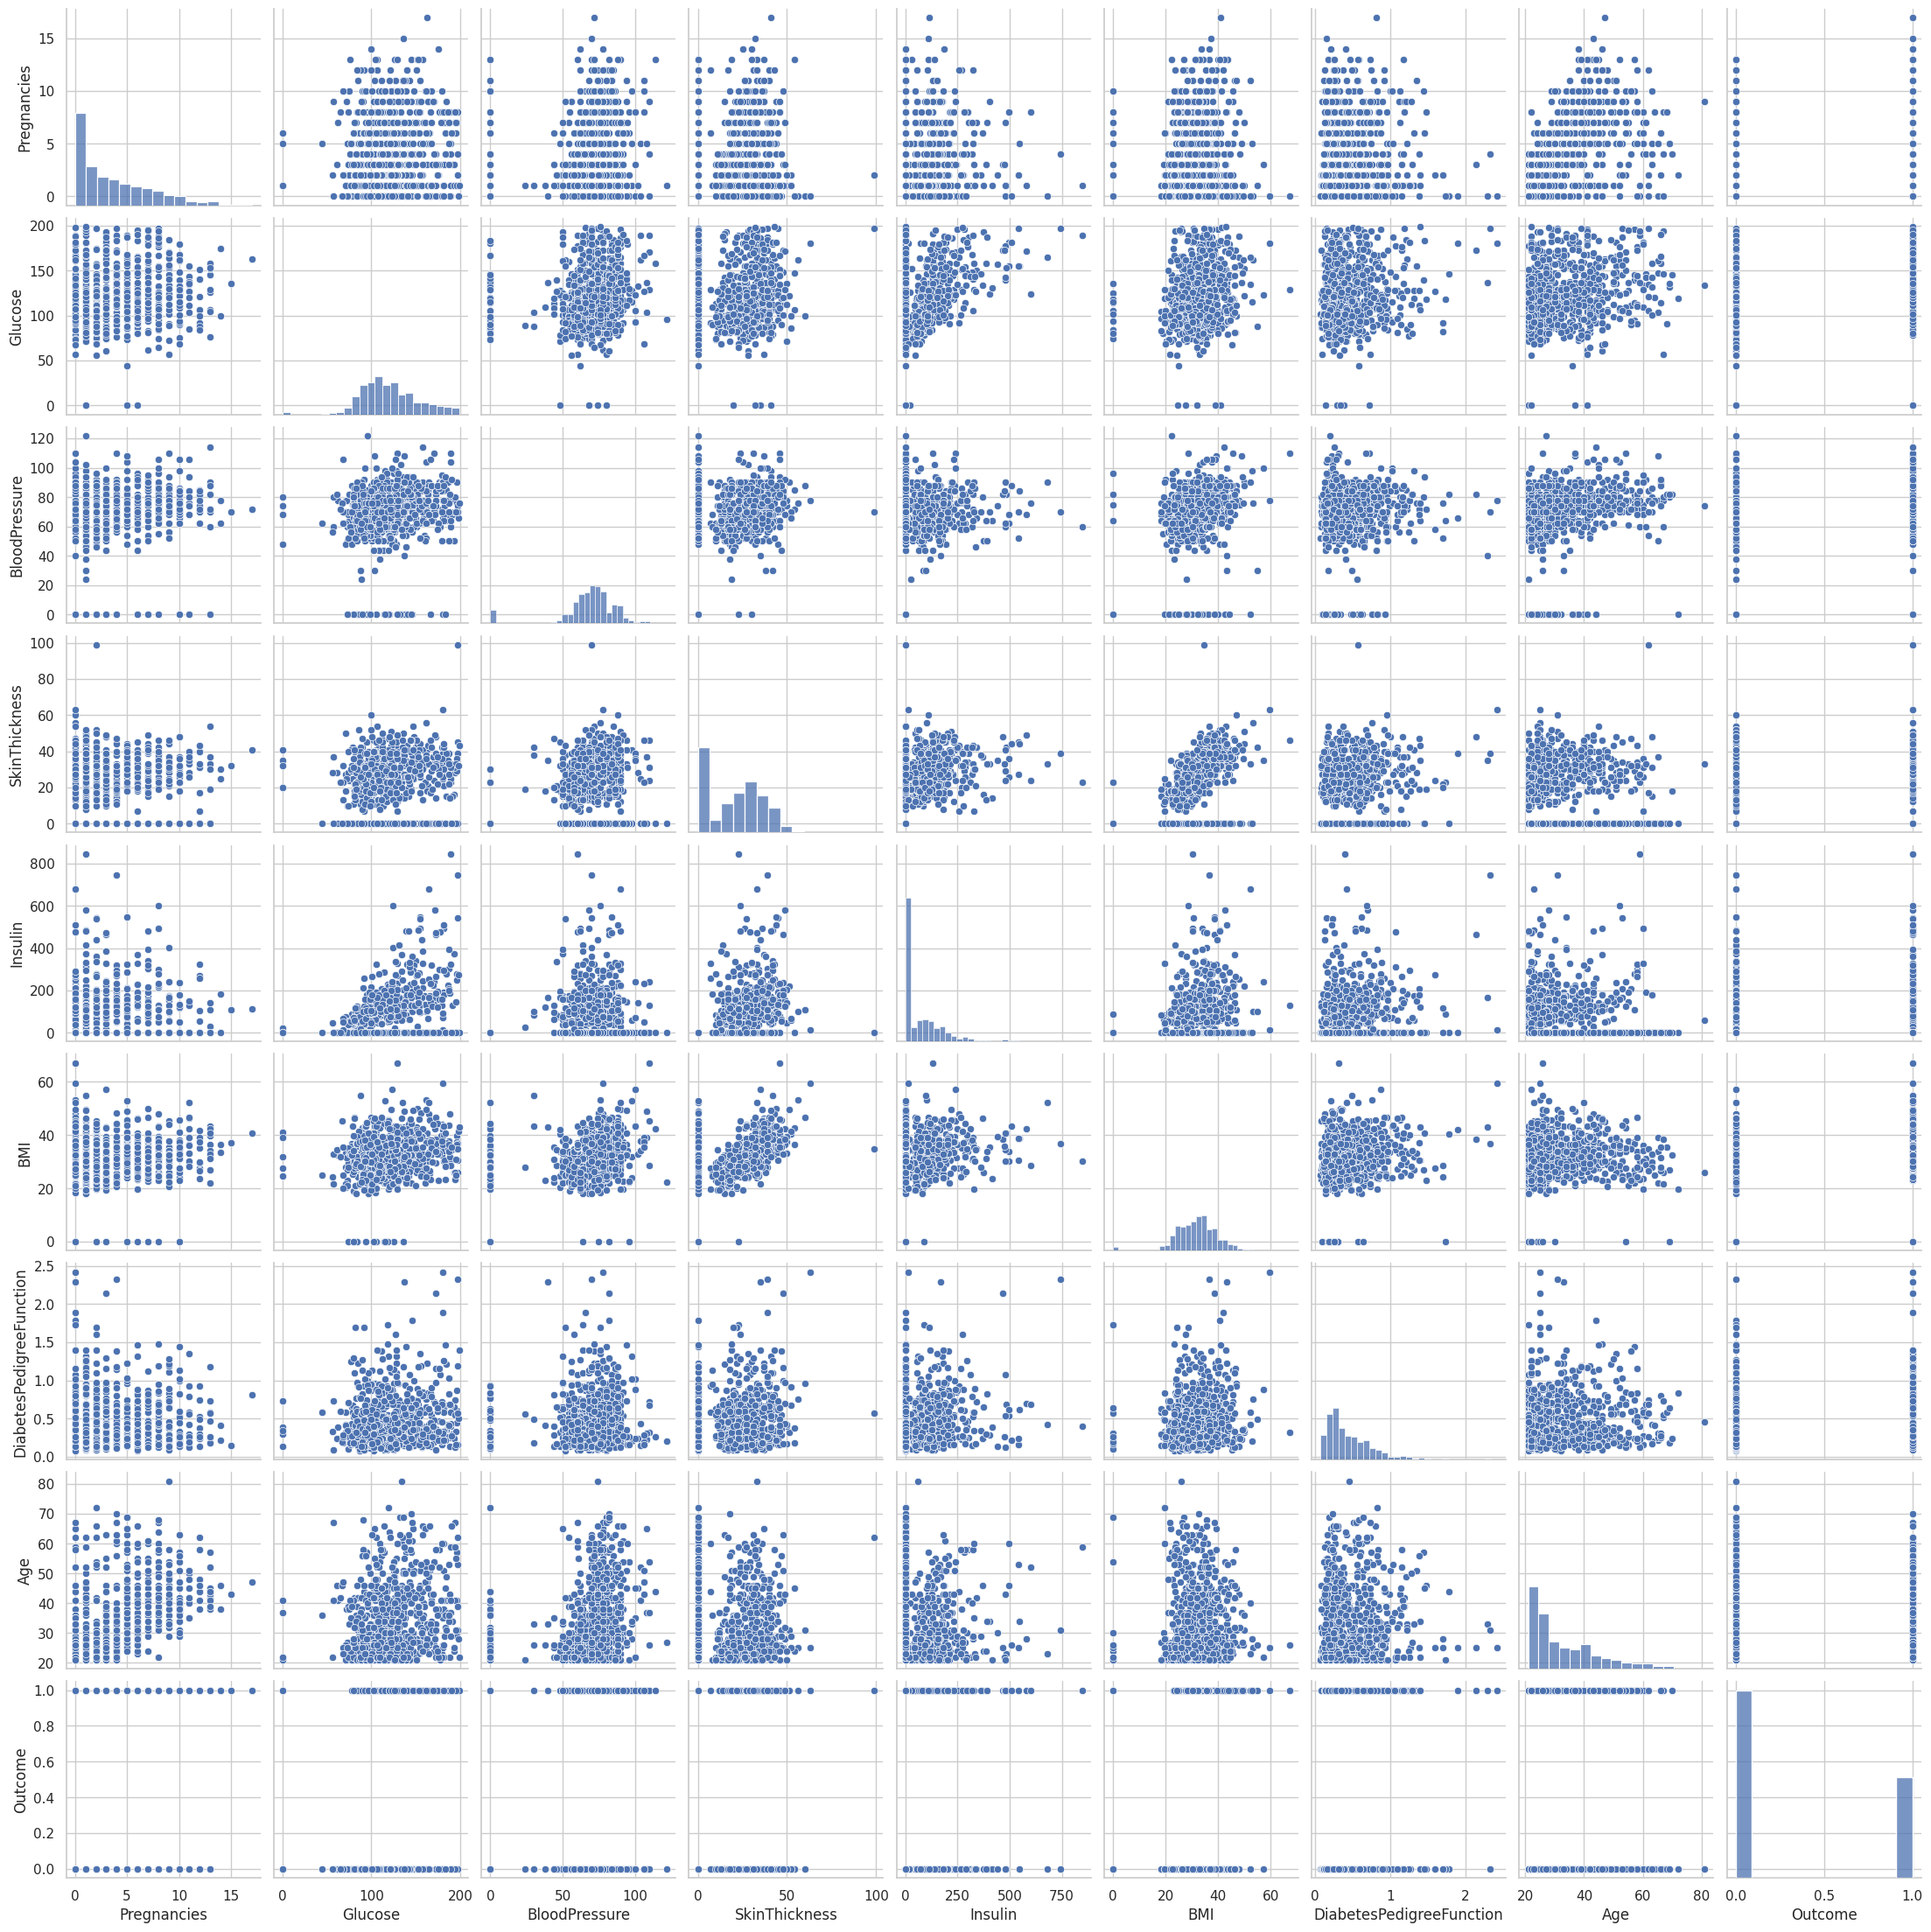

In [17]:
# Plot pair plot to visualize relationships between features
sns.pairplot(df)
plt.show()


Relationships between data points It can be observed that the data points have a variety of distributions which can be seen on each individual histograms. It shows that features such as Insulin, SkinThickness and Pregnancies have a skewed nature, where most of the data lies near 0.

Correlation Some correlation can also be observed between features such as Glucose and BMI, Age and Pregnancies.

Benefits for ML Shows the distributions and relationships between all features, which will inform what preprocessing to apply, as well as showing how effective each individual feature might be in the model.

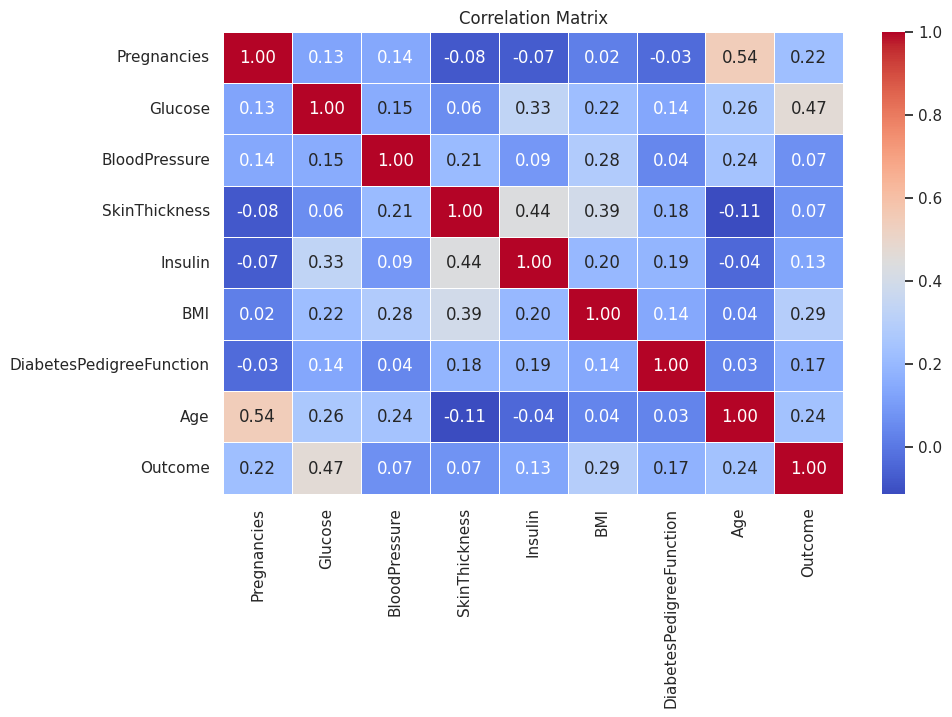

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**High Positive Correlation:** Pregnancies and Age show moderate positive correlation, this suggests there may be some redundant data
**Moderate positive Correlation:** Outcome has a positive correlation with Glucose, and Age . This suggests that these are likely to be the most significant features.

**Low Correlation:** The majority of feature pairs show a relatively weak correlation

**Negative Correlation:** SkinThickness shows a slight negative correlation with Pregnancies and Age

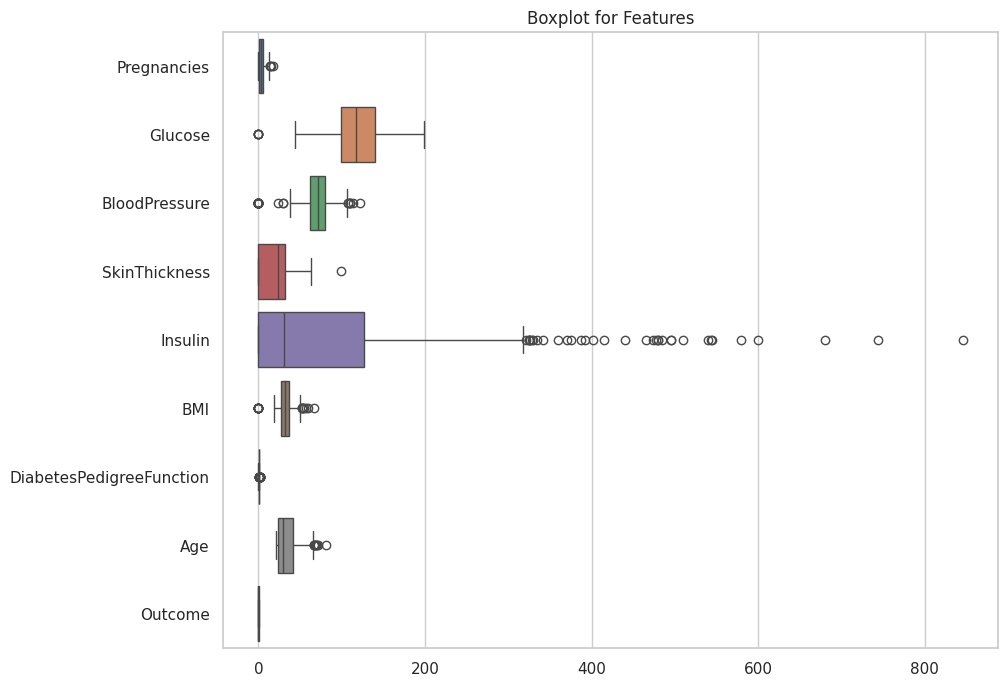

In [19]:
# Boxplot for each feature to detect outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot for Features')
plt.show()


**Outliers:** Features like Insulin, SkinThickness, and, to a lesser extent, BloodPressure have numerous outliers. This suggests these distributions are heavily skewed, and may need outlier handling or transformation.

**Variable Range** The scale of the data is very different, some of the data like pregnancies and DiabetesPedigreeFunction range between 0 and 20, and others like Insulin and glucose range up to 800. This suggests scaling will be important.

**Central Tendency** the median (middle line) for the features show different central tendencies.

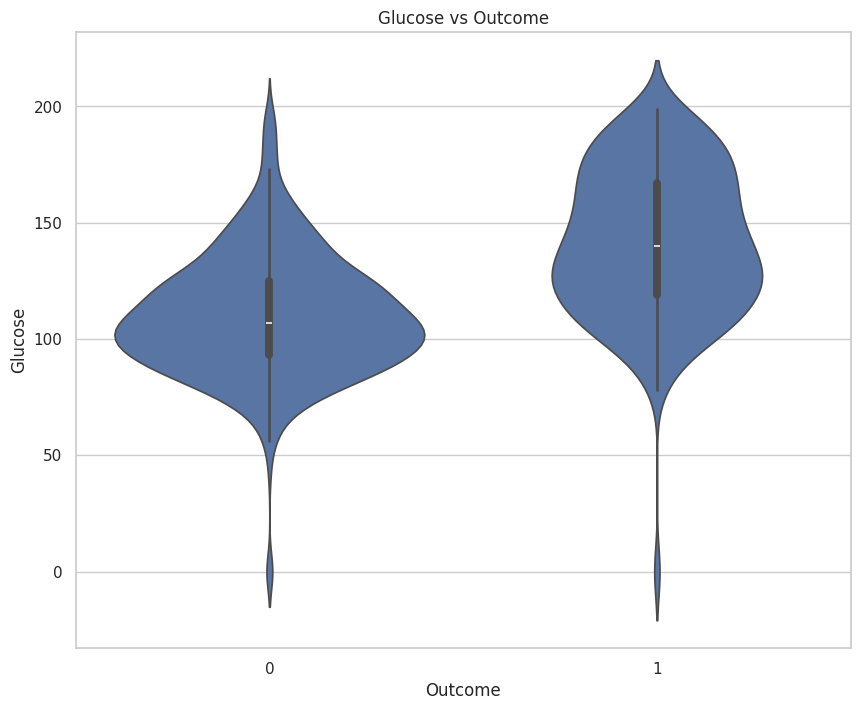

In [20]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Outcome')
plt.show()

The glucose distribution for those with diabetes (1) is shifted towards higher values compared to those without (0). The center of the distributions (the widest part) is at a higher glucose level for Outcome 1.
The distribution for those without diabetes (0) is also more spread out than with diabetes.
There is some overlap in the glucose distributions, indicating that glucose alone is not a perfect predictor of diabetes.

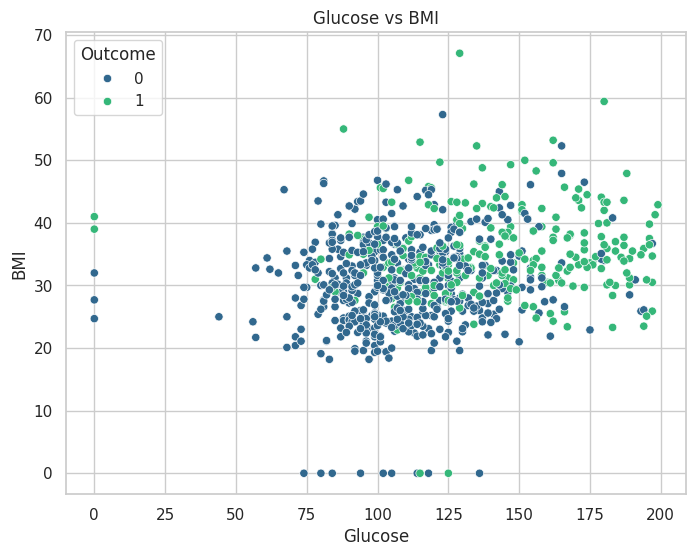

In [21]:
# Scatter plot to see the relationship between 'Glucose' and 'BMI'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette="viridis")
plt.title('Glucose vs BMI')
plt.show()


Patients with lower glucose tend to have lower BMI and patients with higher BMI tend to have higher glucose.

There are also individuals with high BMI but without diabetes.
The plot also shows the overlap between the groups.

## outliers

In [16]:
df = pd.read_csv('/content/diabetes.csv')

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
# Step 2: Handle outliers in X
for col in ['Insulin', 'SkinThickness', 'BloodPressure']:  # Specify columns to process
    lower_bound = x[col].quantile(0.01)  # 1st percentile
    upper_bound = x[col].quantile(0.99)  # 99th percentile
    x[col] = np.clip(x[col], lower_bound, upper_bound)

In [19]:
mms = RobustScaler()
x_scale = mms.fit_transform(x)
x_scale

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x_scale , y , test_size=0.2 , random_state=42 )


In [26]:
# Define models with their respective hyperparameters
models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"]
        }
    },
    "SVC": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(random_state=42, max_iter=500),
        "params": {
            "hidden_layer_sizes": [(16, 8), (32, 16), (64, 32)],
            "activation": ["relu", "tanh"],
            "solver": ["adam", "sgd"]
        }
    }
}

In [30]:
# Initialize results
results = {"Algorithm": [], "Accuracy": [], "Recall": [], "F1 Score": []}

# SMOTE initialization
smote = SMOTE(random_state=42)

In [31]:
# Hyperparameter tuning and training function
def evaluate_model_with_hyperparameters(model_name, model, params, x_train, y_train, x_test, y_test):
    print(f"Evaluating {model_name} with hyperparameters tuning...")

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring="accuracy", verbose=1)
    grid_search.fit(x_train, y_train)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Apply SMOTE to handle class imbalance for the best model
    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    # Train the best model on resampled data
    best_model.fit(x_resampled, y_resampled)

    # Make predictions
    predictions = best_model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')  # 'weighted' for multi-class
    f1 = f1_score(y_test, predictions, average='weighted')

    # Append metrics to results
    results["Algorithm"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

    # Display confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print metrics
    print(f"{model_name} Performance:")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Generate classification report
    clf_report = classification_report(y_test, predictions)
    print(f"Classification Report for {model_name}:")
    print(clf_report)

    # Save classification report to a text file
    with open("best_classification_report.txt", "a") as file:
        file.write(f"Classification Report for {model_name}:\n")
        file.write(clf_report)
        file.write("\n\n" + "="*50 + "\n\n")

    # Save the best model using joblib
    joblib.dump(best_model, f"best_model_{model_name}.joblib")

    print("-" * 50)
    return best_model, accuracy, recall, f1


Evaluating Logistic Regression with hyperparameters tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Confusion Matrix for Logistic Regression:


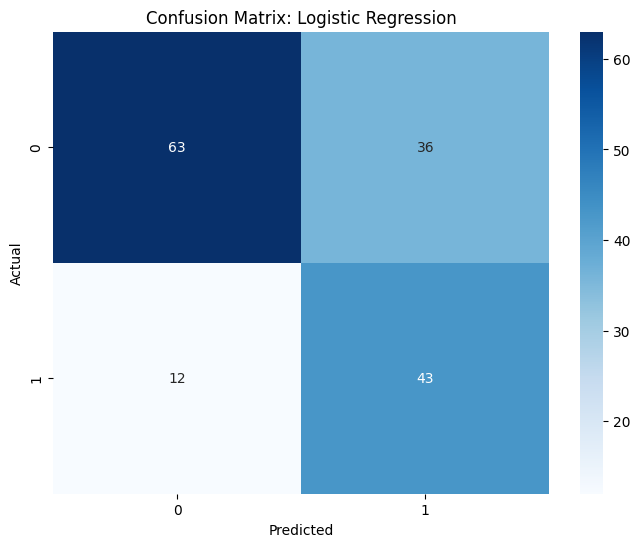

Logistic Regression Performance:
Best Hyperparameters: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.6883
Recall: 0.6883
F1 Score: 0.6947
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.64      0.72        99
           1       0.54      0.78      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.73      0.69      0.69       154

--------------------------------------------------
Evaluating SVC with hyperparameters tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix for SVC:


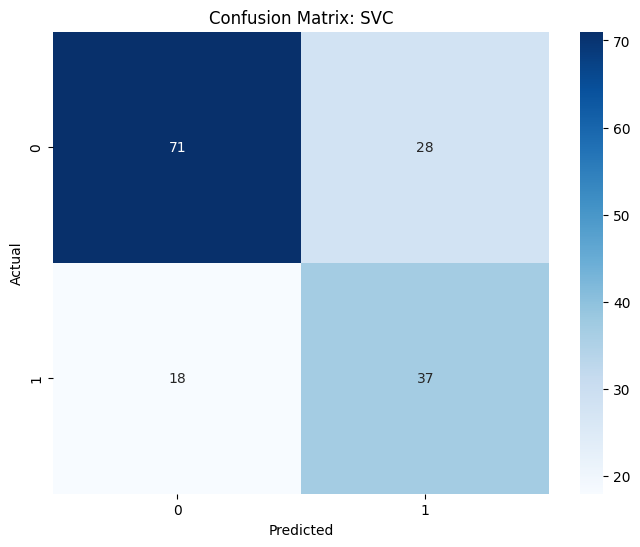

SVC Performance:
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7013
Recall: 0.7013
F1 Score: 0.7058
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154

--------------------------------------------------
Evaluating Random Forest with hyperparameters tuning...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Confusion Matrix for Random Forest:


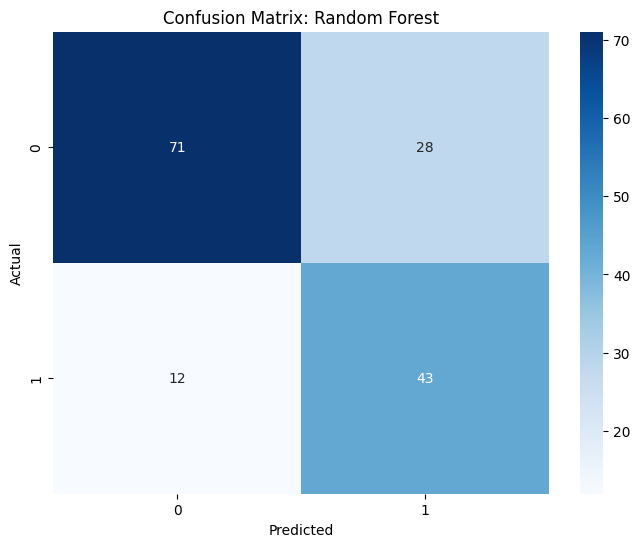

Random Forest Performance:
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.7403
Recall: 0.7403
F1 Score: 0.7453
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        99
           1       0.61      0.78      0.68        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154

--------------------------------------------------
Evaluating Gradient Boosting with hyperparameters tuning...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Confusion Matrix for Gradient Boosting:


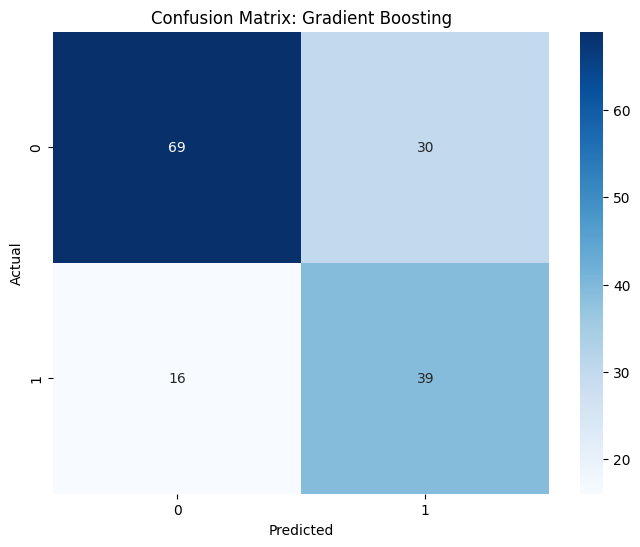

Gradient Boosting Performance:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.7013
Recall: 0.7013
F1 Score: 0.7068
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154

--------------------------------------------------
Evaluating Neural Network with hyperparameters tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix for Neural Network:


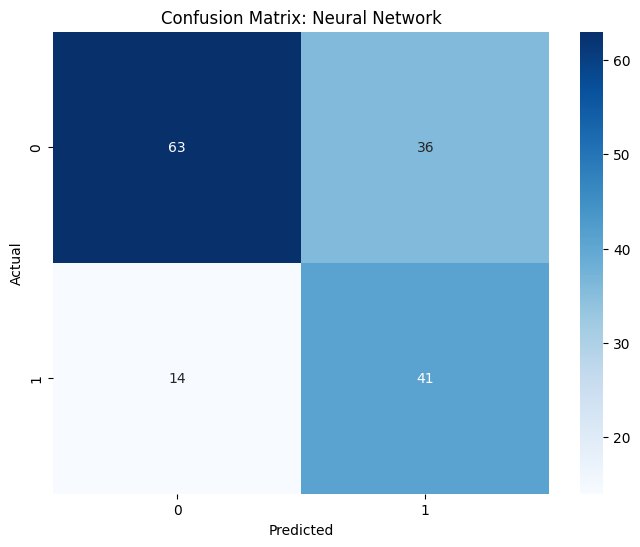

Neural Network Performance:
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (16, 8), 'solver': 'sgd'}
Accuracy: 0.6753
Recall: 0.6753
F1 Score: 0.6821
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        99
           1       0.53      0.75      0.62        55

    accuracy                           0.68       154
   macro avg       0.68      0.69      0.67       154
weighted avg       0.72      0.68      0.68       154

--------------------------------------------------
Best Model: Random Forest
Best Accuracy: 0.7403
Best Recall: 0.7403
Best F1 Score: 0.7453

Final Results with Best Model Highlighted:


,Algorithm,Accuracy,Recall,F1 Score,Best Model
0,Logistic Regression,0.688312,0.688312,0.694728,
1,SVC,0.701299,0.701299,0.705800,
2,Random Forest,0.740260,0.740260,0.745334,Best Model
3,Gradient Boosting,0.701299,0.701299,0.706797,
4,Neural Network,0.675325,0.675325,0.682089,


In [32]:
# Evaluate all models with hyperparameter tuning
best_model = None
best_accuracy = 0
best_recall = 0
best_f1 = 0
best_model_name = ""

for model_name, model_info in models_with_params.items():
    model = model_info["model"]
    params = model_info["params"]
    best_model_temp, accuracy, recall, f1 = evaluate_model_with_hyperparameters(
        model_name, model, params, x_train, y_train, x_test, y_test
    )

    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_recall = recall
        best_f1 = f1
        best_model_name = model_name
        best_model = best_model_temp

# Print the best model's final metrics
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# Save best model and classification report
with open("best_classification_report.txt", "a") as file:
    file.write(f"Best Model: {best_model_name}\n")
    file.write(f"Best Accuracy: {best_accuracy:.4f}\n")
    file.write(f"Best Recall: {best_recall:.4f}\n")
    file.write(f"Best F1 Score: {best_f1:.4f}\n")

# Final Results DataFrame highlighting the best model
final_results = pd.DataFrame(results)
final_results["Best Model"] = final_results["Accuracy"].apply(lambda x: "Best Model" if x == best_accuracy else "")
final_results = final_results.style.apply(
    lambda x: ["background: yellow" if v == "Best Model" else "" for v in x], axis=1
)

print("\nFinal Results with Best Model Highlighted:")
final_results


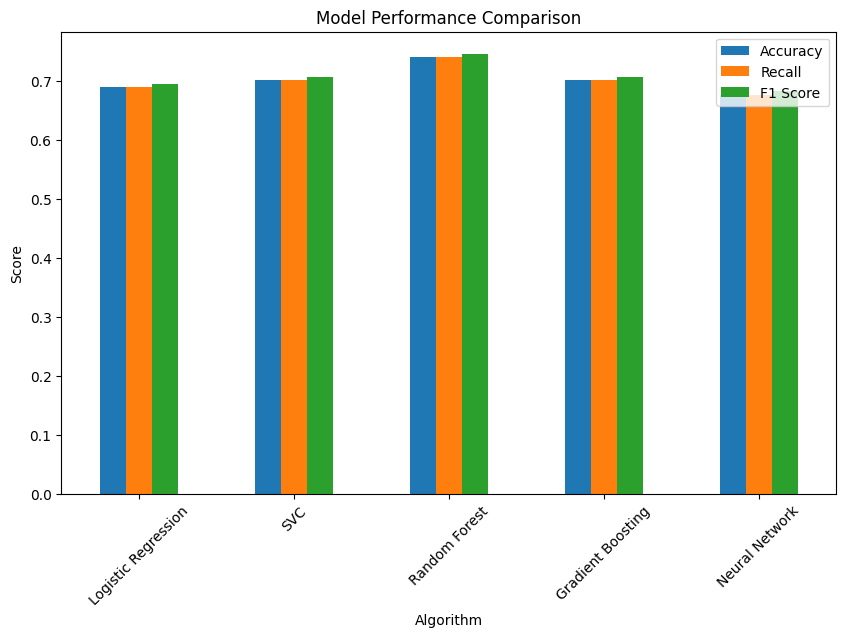

In [33]:
# Visualize the results
final_results_df = final_results.data  # Convert to DataFrame to plot
final_results_df.plot(x="Algorithm", kind="bar", figsize=(10, 6), title="Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


## Test dummy data

In [34]:
import joblib
import pandas as pd
filename = '/content/best_model_Random Forest.joblib'


In [36]:
with open(filename, 'rb') as f:
    model = joblib.load(f)

ypredict = model.predict([[0.167369 ,	0.086320,	0.396678,	0.162444,	0.055740,	0.080268	,0.422727,	0.280750]])

In [37]:
ypredict

array([1])